In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [2]:
df_raw = pd.read_csv('workouts.csv', delimiter=';')

In [3]:
df_raw

,Date,Workout Name,Exercise Name,Set Order,Weight,Weight Unit,Reps,RPE,Distance,Distance Unit,Seconds,Notes,Workout Notes,Workout Duration
0,2022-11-22 19:52:09,Dinsdagavond,Overhead Press (Barbell),1,30.0,kg,12.0,NaN,NaN,NaN,0,NaN,NaN,1h 43m
1,2022-11-22 19:52:09,Dinsdagavond,Overhead Press (Barbell),2,35.0,kg,7.0,NaN,NaN,NaN,0,NaN,NaN,1h 43m
2,2022-11-22 19:52:09,Dinsdagavond,Overhead Press (Barbell),3,35.0,kg,8.0,NaN,NaN,NaN,0,NaN,NaN,1h 43m
3,2022-11-22 19:52:09,Dinsdagavond,Overhead Press (Barbell),4,35.0,kg,8.0,NaN,NaN,NaN,0,NaN,NaN,1h 43m
4,2022-11-22 19:52:09,Dinsdagavond,Bicep Curl (Barbell),1,30.0,kg,12.0,NaN,NaN,NaN,0,NaN,NaN,1h 43m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8673,2024-09-07 13:32:26,Midday Workout,Chest Dip,2,NaN,NaN,10.0,NaN,NaN,NaN,0,NaN,NaN,57m
8674,2024-09-07 13:32:26,Midday Workout,Chest Dip,3,NaN,NaN,10.0,NaN,NaN,NaN,0,NaN,NaN,57m
8675,2024-09-07 13:32:26,Midday Workout,Lateral Raise (Dumbbell),1,28.0,kg,12.0,NaN,NaN,NaN,0,NaN,NaN,57m
8676,2024-09-07 13:32:26,Midday Workout,Lateral Raise (Dumbbell),2,32.0,kg,12.0,NaN,NaN,NaN,0,NaN,NaN,57m


In [4]:
# Drop empty columns and columns irrelevant to analysis
df = df_raw.drop(columns=['Distance', 'Workout Name', 'RPE', 'Distance Unit', 'Workout Duration', 'Seconds', 'Notes', 'Workout Notes', 'Weight Unit'], axis=1)
df

,Date,Exercise Name,Set Order,Weight,Reps
0,2022-11-22 19:52:09,Overhead Press (Barbell),1,30.0,12.0
1,2022-11-22 19:52:09,Overhead Press (Barbell),2,35.0,7.0
2,2022-11-22 19:52:09,Overhead Press (Barbell),3,35.0,8.0
3,2022-11-22 19:52:09,Overhead Press (Barbell),4,35.0,8.0
4,2022-11-22 19:52:09,Bicep Curl (Barbell),1,30.0,12.0
...,...,...,...,...,...
8673,2024-09-07 13:32:26,Chest Dip,2,NaN,10.0
8674,2024-09-07 13:32:26,Chest Dip,3,NaN,10.0
8675,2024-09-07 13:32:26,Lateral Raise (Dumbbell),1,28.0,12.0
8676,2024-09-07 13:32:26,Lateral Raise (Dumbbell),2,32.0,12.0


## Pre-process the data

In [5]:
# Convert datestring to date object
df['Date'] = pd.to_datetime(df['Date'])

# Per exercise set, calculate the total amount of volume (reps*sets) and the 'estimated 1RM', based on the Epley formula
df['Volume'] = df['Weight'] * df['Reps']
df['Estimated_1RM'] = df['Weight'] * (1 + (0.0333 * df['Reps'])) #epley formula

Show processed sets. Each set is a row in the table

In [6]:
df

,Date,Exercise Name,Set Order,Weight,Reps,Volume,Estimated_1RM
0,2022-11-22 19:52:09,Overhead Press (Barbell),1,30.0,12.0,360.0,41.9880
1,2022-11-22 19:52:09,Overhead Press (Barbell),2,35.0,7.0,245.0,43.1585
2,2022-11-22 19:52:09,Overhead Press (Barbell),3,35.0,8.0,280.0,44.3240
3,2022-11-22 19:52:09,Overhead Press (Barbell),4,35.0,8.0,280.0,44.3240
4,2022-11-22 19:52:09,Bicep Curl (Barbell),1,30.0,12.0,360.0,41.9880
...,...,...,...,...,...,...,...
8673,2024-09-07 13:32:26,Chest Dip,2,NaN,10.0,NaN,NaN
8674,2024-09-07 13:32:26,Chest Dip,3,NaN,10.0,NaN,NaN
8675,2024-09-07 13:32:26,Lateral Raise (Dumbbell),1,28.0,12.0,336.0,39.1888
8676,2024-09-07 13:32:26,Lateral Raise (Dumbbell),2,32.0,12.0,384.0,44.7872


## Create summary for each unique exercise

In [7]:
# Create summary of all exercises
df_exercises_summary = df['Exercise Name'].reset_index()

# Get the total amount unique workouts that this exercise was performed in
df_exercises_summary['total_exercise_count'] = df.groupby('Exercise Name')['Date'].transform('nunique')

# Get the total amount of sets that were performed for each exercise
df_exercises_summary['total_set_count'] = df.groupby('Exercise Name')['Exercise Name'].transform('size')

# Get the total amount of reps that were performed for each exercise
df_exercises_summary['total_rep_count'] = df.groupby('Exercise Name')['Reps'].transform('sum')

# Drop dupplicate rows
df_exercises_summary = df_exercises_summary.drop_duplicates(subset=['Exercise Name']).reset_index(drop=True)

# Filter out exercises that were performed a minimum amount of time
df_exercises_summary = df_exercises_summary[df_exercises_summary['total_exercise_count'] >= 25]

# Sort exercises based on how frequently they have been performed
df_exercises_summary = df_exercises_summary.sort_values('total_exercise_count', ascending=False).reset_index()

df_exercises_summary.drop(columns=['level_0', 'index'], axis=1, inplace=True)

In [8]:
df_exercises_summary

,Exercise Name,total_exercise_count,total_set_count,total_rep_count
0,Bench Press (Barbell),110,468,3684.0
1,Squat (Barbell),98,369,3354.0
2,Bent Over Row (Barbell),93,376,3777.0
3,Deadlift (Barbell),83,373,2497.0
4,Seated Overhead Press (Dumbbell),81,340,3140.0
5,Lat Pulldown (Cable),68,255,2550.0
6,Pull Up,67,335,2298.0
7,Chest Fly,64,241,2330.0
8,Incline Bench Press (Dumbbell),55,204,1744.0
9,Calf Press on Seated Leg Press,52,188,2824.0


In [9]:
# Drop pull ups because and chest dips as they are bodyweight exercises and since lack of weight value, the 1RM could not be esitmated
df_exercises_summary = df_exercises_summary[~df_exercises_summary['Exercise Name'].isin(['Pull Up', 'Chest Dip'])]

## Classify exercises based on targetted muscle group
The table above lists all the unique exercises.<br>
These exercises can be classified on the muscle group that they target.<br>
This information is not available in the dataset so we have to classify manually.<br>
Some muscles may target two main muscle groups and are added to both (eg., Incline Bench press targets both shoulders and chest).<br>
For that reason there are multiple columns, rather than a single 'Muscle group' column
It is possible to classify even further (eg., equiptment used, such as Barbell, Dumbbell, Cabkem Machine, bodyweight, etc.). This is now left out of scope.

In [10]:
muscleGroupLabels = ["Chest", "Back", "Biceps", "Triceps", "Legs", "Shoulders", "Other"]
exercisesPerMuscleGroup = [
    ["Bench Press (Barbell)", "Chest Fly", "Chest Fly (Dumbbell)", "Chest Dip", "Bench Press (Dumbbell)", "Push Up", "High cable crossover"],
    ["Bent Over Row (Barbell)", "Deadlift (Barbell)", "Pull Up", "Seated Row (Cable)", "Bent Over One Arm Row (Dumbbell)", "Pullover (Dumbbell)", "Straight arm pulldown", "Lat Pulldown (Cable)", "Dumbbell curl over bench"],
    ["Hammer Curl (Dumbbell)", "Bicep Curl (Barbell)", "Ez-bar curl", "Bicep Curl (Machine)"],
    ["Triceps Pushdown (Cable - Straight Bar)", "Skullcrusher (Barbell)", "triceps pushdown triangle", "Cable pushdown rope", "Bench Press - Close Grip (Barbell)"],
    ["Squat (Barbell)", "Leg Extension (Machine)", "Seated Leg Press (Machine)", "seated leg curl meijel", "Bulgarian Split Squat", "Leg press meijel", "Romanian Deadlift (Barbell)", "Front Squat (Barbell)", "romanian deadlift smith machine"],
    ["Seated Overhead Press (Dumbbell)", "Overhead Press (Barbell)", "Lateral Raise (Cable)", "Lateral Raise (Dumbbell)", "Front Raise (Dumbbell)", "Seated Overhead Press (Smith Machine)", "Shoulder Press (Machine)", "Front Raise (Cable)", "Upright Row (Barbell)"],
    ["Calf Press on Seated Leg Press", "Standing Calf Raise (Machine)", "Reverse Fly (Machine)","Reverse Fly (Cable)", "Shrug (Barbell",  "Incline Bench Press (Dumbbell)", "Lat Pulldown - Underhand (Cable)", "Chin Up", "reverse fly single", "Incline Bench Press (Barbell)"],
]
for i, exercisesInGroup in enumerate(exercisesPerMuscleGroup):
    for exercise in exercisesInGroup:
        df.loc[df["Exercise Name"] == exercise, "TargetMuscleGroup"] = muscleGroupLabels[i]
        df_exercises_summary.loc[df_exercises_summary["Exercise Name"] == exercise, "TargetMuscleGroup"] = muscleGroupLabels[i]

# Drop any exercise not belonging to a main muscle group, or that target multiple muscle groups which makes it more difficult to analyse
df_exercises_summary = df_exercises_summary[df_exercises_summary['TargetMuscleGroup'] != "Other"]


In [11]:
df_exercises_summary

,Exercise Name,total_exercise_count,total_set_count,total_rep_count,TargetMuscleGroup
0,Bench Press (Barbell),110,468,3684.0,Chest
1,Squat (Barbell),98,369,3354.0,Legs
2,Bent Over Row (Barbell),93,376,3777.0,Back
3,Deadlift (Barbell),83,373,2497.0,Back
4,Seated Overhead Press (Dumbbell),81,340,3140.0,Shoulders
5,Lat Pulldown (Cable),68,255,2550.0,Back
7,Chest Fly,64,241,2330.0,Chest
10,Leg Extension (Machine),51,182,2085.0,Legs
12,Overhead Press (Barbell),47,198,1734.0,Shoulders
13,Seated Row (Cable),46,177,1798.0,Back


In [12]:
print("Total amount of sets: ", df_exercises_summary['total_set_count'].sum())

Total amount of sets:  4590


## Workout Summary
It is possible to extend workout summary (eg., total volume of all exercises, total amount of exercises and sets, and more)<br>
This is now left out of scope<br>
Workouts are summarized below so we can get the amount of time inbetween workouts (rest time)

In [13]:
#df_workouts = df.drop_duplicates(subset='Date')[['Date', 'Time of day']].reset_index(drop=True)
df_workouts = df.drop_duplicates(subset='Date')[['Date']].reset_index(drop=True)
df_workouts['days_since_last_workout'] = round(df_workouts['Date'].diff().dt.total_seconds() / 3600 / 24, 1)
df_workouts

,Date,days_since_last_workout
0,2022-11-22 19:52:09,NaN
1,2022-11-23 22:28:04,1.1
2,2022-11-24 20:17:27,0.9
3,2022-11-25 08:01:59,0.5
4,2022-11-28 20:32:51,3.5
...,...,...
449,2024-09-01 12:54:04,0.8
450,2024-09-04 21:46:21,3.4
451,2024-09-05 21:38:10,1.0
452,2024-09-06 18:49:31,0.9


## Summarize exercises per workout
Sets of exercises of the same type that are performed during the same workout will be merged together and summarized.<br>
The maximum volume or maximum 1RM can be used later in notebook as measure of strength.<br>
Also for each exercise the difference to the previous execution of this exercise in a previous workout is listed. This can be used as indicator of progress.

In [14]:
def summarize_exercise_per_workout(df, exercise):
    df_exercise = df[df['Exercise Name'] == exercise]    
    df_exercise['nr_sets'] = df_exercise.groupby(['Exercise Name', 'Date']).transform('size')
    df_exercise['total_nr_reps'] = df_exercise.groupby(['Exercise Name', 'Date'])['Reps'].transform('sum')
    df_exercise['max_estimated_1RM'] = df_exercise.groupby(['Exercise Name', 'Date'])['Estimated_1RM'].transform('max')
    df_exercise['max_volume'] = df_exercise.groupby(['Exercise Name', 'Date'])['Volume'].transform('max')
    df_exercise['max_weight'] = df_exercise.groupby(['Exercise Name', 'Date'])['Weight'].transform('max')
    df_exercise['total_volume'] = df_exercise.groupby(['Exercise Name', 'Date'])['Volume'].transform('sum')
    #df_exercise['mean_volume'] = df_exercise.groupby(['Exercise Name', 'Date'])['Volume'].transform('mean')
    #df_exercise['mean_weight'] = df_exercise.groupby(['Exercise Name', 'Date'])['Weight'].transform('mean')
    #df_exercise['mean_estimated_1RM'] = df_exercise.groupby(['Exercise Name', 'Date'])['Estimated_1RM'].transform('mean')

    # Filter out duplicates and drop columns that are not relevant to summary
    df_exercise = df_exercise.drop(columns=['Estimated_1RM', 'Set Order', 'Weight', 'Reps', 'Volume'], axis=1)
    df_exercise = df_exercise.drop_duplicates(subset=['Date']).dropna().reset_index(drop=True)
    df_exercise = df_exercise.sort_values('Date', ascending=True).reset_index(drop=True)

    # Retrieve delta's relative to previous execution of the exercise
    df_exercise['days_since_last_same_exercise'] = df_exercise['Date'].diff().dt.days
    df_exercise['delta_max_estimated_1RM'] = df_exercise['max_estimated_1RM'].diff()
    # df_exercise['delta_max_volume'] = df_exercise['max_volume'].diff()
    # df_exercise['delta_max_weight'] = df_exercise['max_weight'].diff()
    #df_exercise['delta_total_volume'] = df_exercise['total_volume'].diff()
    #df_exercise['delta_mean_volume'] = df_exercise['mean_volume'].diff()
    #df_exercise['delta_mean_weight'] = df_exercise['mean_weight'].diff()
    #df_exercise['delta_mean_estimated_1RM'] = df_exercise['mean_estimated_1RM'].diff()
    
    return df_exercise

In [15]:
dfExercisesWorkoutSummary = pd.concat(
    [summarize_exercise_per_workout(df, row['Exercise Name']) for _, row in df_exercises_summary.iterrows()],
    ignore_index=True)

In [16]:
# Add days since last workout to each exercise
dfExercisesWorkoutSummary = dfExercisesWorkoutSummary.merge(df_workouts[['Date', 'days_since_last_workout']], on='Date', how='left').reset_index(drop=True)

In [17]:
# Sort exercise summaries by date
dfExercisesWorkoutSummary = dfExercisesWorkoutSummary.sort_values('Date', ascending=True).reset_index(drop=True)

In [18]:
dfExercisesWorkoutSummary = dfExercisesWorkoutSummary.dropna().reset_index(drop=True)

In [19]:
dfExercisesWorkoutSummary

,Date,Exercise Name,TargetMuscleGroup,nr_sets,total_nr_reps,max_estimated_1RM,max_volume,max_weight,total_volume,days_since_last_same_exercise,delta_max_estimated_1RM,days_since_last_workout
0,2022-11-29 20:29:12,Lateral Raise (Dumbbell),Shoulders,4,46.0,33.5904,288.0,24.0,1056.0,5.0,0.0000,1.0
1,2022-11-29 20:29:12,Seated Overhead Press (Dumbbell),Shoulders,4,38.0,62.3896,528.0,52.0,1756.0,5.0,0.0000,1.0
2,2022-11-29 20:29:12,Hammer Curl (Dumbbell),Biceps,4,33.0,47.9880,384.0,40.0,1152.0,5.0,0.0000,1.0
3,2022-11-30 20:53:16,Squat (Barbell),Legs,3,30.0,125.9640,1080.0,100.0,2760.0,5.0,0.0000,1.0
4,2022-12-02 20:44:20,Bench Press (Barbell),Chest,5,27.0,86.6450,650.0,80.0,1900.0,4.0,-1.3470,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1121,2024-09-04 21:46:21,Seated Row (Cable),Back,4,38.0,82.3160,660.0,65.0,2300.0,26.0,-6.3320,3.4
1122,2024-09-06 18:49:31,Squat (Barbell),Legs,3,25.0,116.9730,840.0,100.0,2050.0,6.0,2.9970,0.9
1123,2024-09-07 13:32:26,Lateral Raise (Dumbbell),Shoulders,3,35.0,49.1868,396.0,36.0,1116.0,18.0,1.1988,0.8
1124,2024-09-07 13:32:26,Chest Fly (Dumbbell),Chest,3,29.0,44.7872,384.0,36.0,900.0,63.0,-0.8032,0.8


In [20]:
# Add to each exercise the number of days since the last workout in which one of the targeted muscles groups was targetted:
dfExercisesWorkoutSummaryDesc = dfExercisesWorkoutSummary.sort_values('Date', ascending=False)
x = 0
for i, row in dfExercisesWorkoutSummary.iterrows():    
    x += 1
    dfExercisesBefore = dfExercisesWorkoutSummaryDesc[dfExercisesWorkoutSummaryDesc['Date'] < row['Date']]
    dfExercisesBefore = dfExercisesBefore[dfExercisesBefore['TargetMuscleGroup'] == row['TargetMuscleGroup']]
    dateDiff = 0
    if dfExercisesBefore.index.size:
        dateDiff = round((dfExercisesWorkoutSummary.loc[i, "Date"] - dfExercisesBefore.iloc[0]["Date"]).total_seconds()/3600/24,1)
    dfExercisesWorkoutSummary.loc[i, 'days_since_same_muslce_group'] = dateDiff

In [21]:
dfExercisesWorkoutSummary

,Date,Exercise Name,TargetMuscleGroup,nr_sets,total_nr_reps,max_estimated_1RM,max_volume,max_weight,total_volume,days_since_last_same_exercise,delta_max_estimated_1RM,days_since_last_workout,days_since_same_muslce_group
0,2022-11-29 20:29:12,Lateral Raise (Dumbbell),Shoulders,4,46.0,33.5904,288.0,24.0,1056.0,5.0,0.0000,1.0,0.0
1,2022-11-29 20:29:12,Seated Overhead Press (Dumbbell),Shoulders,4,38.0,62.3896,528.0,52.0,1756.0,5.0,0.0000,1.0,0.0
2,2022-11-29 20:29:12,Hammer Curl (Dumbbell),Biceps,4,33.0,47.9880,384.0,40.0,1152.0,5.0,0.0000,1.0,0.0
3,2022-11-30 20:53:16,Squat (Barbell),Legs,3,30.0,125.9640,1080.0,100.0,2760.0,5.0,0.0000,1.0,0.0
4,2022-12-02 20:44:20,Bench Press (Barbell),Chest,5,27.0,86.6450,650.0,80.0,1900.0,4.0,-1.3470,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121,2024-09-04 21:46:21,Seated Row (Cable),Back,4,38.0,82.3160,660.0,65.0,2300.0,26.0,-6.3320,3.4,6.0
1122,2024-09-06 18:49:31,Squat (Barbell),Legs,3,25.0,116.9730,840.0,100.0,2050.0,6.0,2.9970,0.9,6.1
1123,2024-09-07 13:32:26,Lateral Raise (Dumbbell),Shoulders,3,35.0,49.1868,396.0,36.0,1116.0,18.0,1.1988,0.8,11.7
1124,2024-09-07 13:32:26,Chest Fly (Dumbbell),Chest,3,29.0,44.7872,384.0,36.0,900.0,63.0,-0.8032,0.8,6.0


## Enrich Exercise Summary

In [22]:
for index, row in df_exercises_summary.iterrows():
    exercise = row['Exercise Name']
    
    # For each exercise, get the mean progress (delta) in weight, volume and estimated_1RM, seen over all workouts
    # df_exercises_summary.loc[df_exercises_summary['Exercise Name'] == exercise, 'mean_delta_max_weight']= np.nanmean(dfExercisesWorkoutSummary[dfExercisesWorkoutSummary["Exercise Name"] == exercise]['delta_max_weight'])
    # df_exercises_summary.loc[df_exercises_summary['Exercise Name'] == exercise, 'mean_delta_max_volume']= np.nanmean(dfExercisesWorkoutSummary[dfExercisesWorkoutSummary["Exercise Name"] == exercise]['delta_max_volume'])
    # df_exercises_summary.loc[df_exercises_summary['Exercise Name'] == exercise, 'mean_delta_max_estimated_1RM'] = np.nanmean(dfExercisesWorkoutSummary[dfExercisesWorkoutSummary["Exercise Name"] == exercise]['delta_max_estimated_1RM'])
    
    # Get the the highest 1RM, volume and weight ever recorded for each exercise 
    df_exercises_summary.loc[df_exercises_summary['Exercise Name'] == exercise, 'max_estimated_1RM'] = round(dfExercisesWorkoutSummary[dfExercisesWorkoutSummary["Exercise Name"] == exercise]['max_estimated_1RM'].max(),1)
    # df_exercises_summary.loc[df_exercises_summary['Exercise Name'] == exercise, 'max_volume'] = dfExercisesWorkoutSummary[dfExercisesWorkoutSummary["Exercise Name"] == exercise]['max_volume'].max()
    # df_exercises_summary.loc[df_exercises_summary['Exercise Name'] == exercise, 'max_weight'] = dfExercisesWorkoutSummary[dfExercisesWorkoutSummary["Exercise Name"] == exercise]['max_weight'].max()

In [23]:
df_exercises_summary.head(5)

,Exercise Name,total_exercise_count,total_set_count,total_rep_count,TargetMuscleGroup,max_estimated_1RM
0,Bench Press (Barbell),110,468,3684.0,Chest,101.3
1,Squat (Barbell),98,369,3354.0,Legs,143.0
2,Bent Over Row (Barbell),93,376,3777.0,Back,109.3
3,Deadlift (Barbell),83,373,2497.0,Back,195.0
4,Seated Overhead Press (Dumbbell),81,340,3140.0,Shoulders,80.2


## What is the optimal amount of rest days on strength increase?

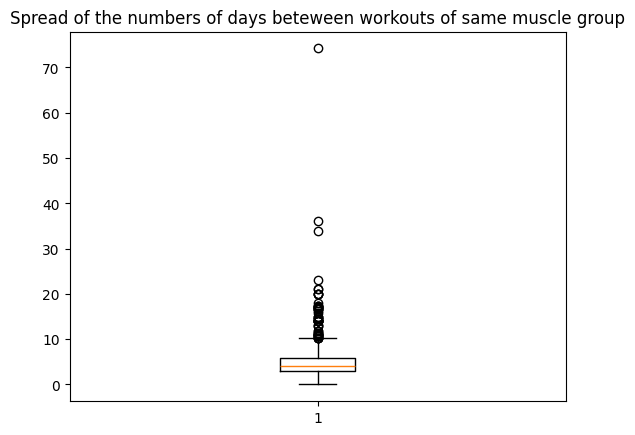

In [24]:
def boxplot_rest_days_spread(df, restDayColumn):
    plt.boxplot(df[restDayColumn])
boxplot_rest_days_spread(dfExercisesWorkoutSummary, 'days_since_same_muslce_group')
plt.title('Spread of the numbers of days beteween workouts of same muscle group')
plt.savefig('boxplot.jpg')

In [25]:
def filter_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_filtered

dfExercisesWorkoutSummaryFiltered = filter_outliers(dfExercisesWorkoutSummary, 'days_since_same_muslce_group')

[ 0.  4.  3.  5.  7.  2.  1.  6. 10.  8.  9.]
10.0


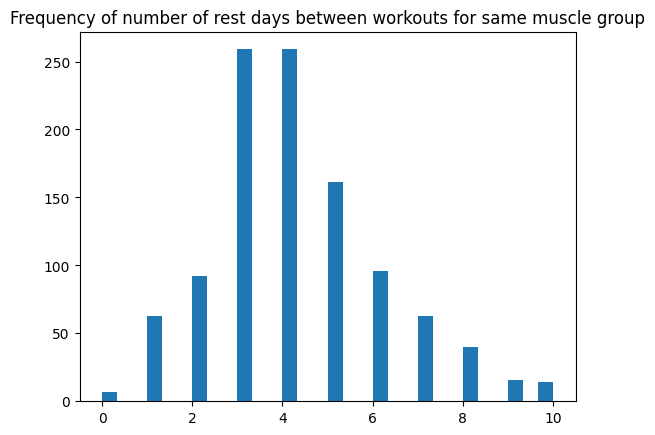

In [26]:
def hist_rest_days_spread(df, restDayColumn):
    df[restDayColumn] = df[restDayColumn].round()
    print(df[restDayColumn].unique())
    plt.hist(df[restDayColumn], bins=30)
    print(max(df[restDayColumn].unique()))
    plt.xlim()
#dfExercisesWorkoutSummary.to_csv('test.csv')
hist_rest_days_spread(dfExercisesWorkoutSummaryFiltered, 'days_since_same_muslce_group')
plt.title('Frequency of number of rest days between workouts for same muscle group')
plt.savefig('hist.jpg')

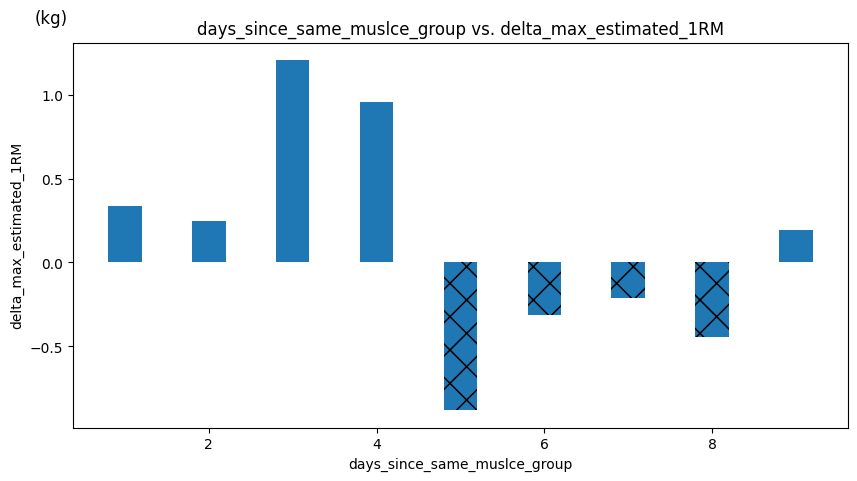

In [27]:
def plot_corr_rest_days_vs_progress(df, restDayColumn, progressColumn):
    df[restDayColumn] = df[restDayColumn].round()
    df['mean'] = df.groupby(restDayColumn)[progressColumn].transform('mean')
    group_sizes = df.groupby(restDayColumn).size().reset_index(name='Nr_exercises')
    df = pd.merge(df, group_sizes, on=restDayColumn)
    df = df[(df[restDayColumn] < 10) & (df[restDayColumn] > 0)]
    plt.figure(figsize=(10,5))
    plt.text(-0.05, 1.05, '(kg)', transform=plt.gca().transAxes, fontsize=12)
    bars = plt.bar(df[restDayColumn], df['mean'], alpha=0.7, width=0.4)
    for bar in bars:
        if bar.get_height() < 0:
            bar.set_hatch('x')
            #bar.set_color("red")
        #else:
            #bar.set_color("green")
    plt.ylabel(progressColumn)
    plt.xlabel(restDayColumn)
    plt.title("{} vs. {}".format(restDayColumn, progressColumn))
    plt.savefig('result.jpg')

plot_corr_rest_days_vs_progress(dfExercisesWorkoutSummary, 'days_since_same_muslce_group', 'delta_max_estimated_1RM')

In [28]:
#plot_corr_rest_days_vs_progress(dfExercisesWorkoutSummary, 'days_since_last_workout', 'delta_max_estimated_1RM')
#plot_corr_rest_days_vs_progress(dfExercisesWorkoutSummary, 'days_since_last_same_exercise', 'delta_max_estimated_1RM')